# In the land of sleep analysis
- Used the fitbit API to collect personal sleep data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import datetime

%matplotlib inline

## Distribution of Sleep Stages

In [2]:
# import data previously collected and saved as csv
slsummaryall_df = pd.read_csv('./downloads/slsummarystagesall.csv')

In [3]:
# add day of the week to the dataframe
slsummaryall_df['Date'] = pd.to_datetime(slsummaryall_df['Date'])
slsummaryall_df['DOW'] = slsummaryall_df['Date'].dt.weekday_name

In [4]:
# quick look at the dataframe
slsummaryall_df.head()

,Date,DOW,Duration,Efficiency,MainSleep,Minutes Asleep,Minutes Awake,Sleep_Deep,Sleep_Light,Sleep_REM,Sleep_stage_Wake,Sleep_stage_Wake_Count,Time in Bed
0,2018-04-15,Sunday,26820000,97,True,398,49,57,277,64,49,13,447
1,2018-04-16,Monday,33000000,97,True,464,86,71,319,74,86,23,550
2,2018-04-18,Wednesday,35040000,92,True,508,76,36,399,73,76,25,584
3,2018-04-20,Friday,30420000,95,True,433,74,31,342,60,74,33,507
4,2018-04-21,Saturday,29520000,94,True,411,81,48,309,54,81,22,492


In [6]:
slsummaryall_df.dtypes

Date                      datetime64[ns]
DOW                               object
Duration                           int64
Efficiency                         int64
MainSleep                           bool
Minutes Asleep                     int64
Minutes Awake                      int64
Sleep_Deep                         int64
Sleep_Light                        int64
Sleep_REM                          int64
Sleep_stage_Wake                   int64
Sleep_stage_Wake_Count             int64
Time in Bed                        int64
dtype: object

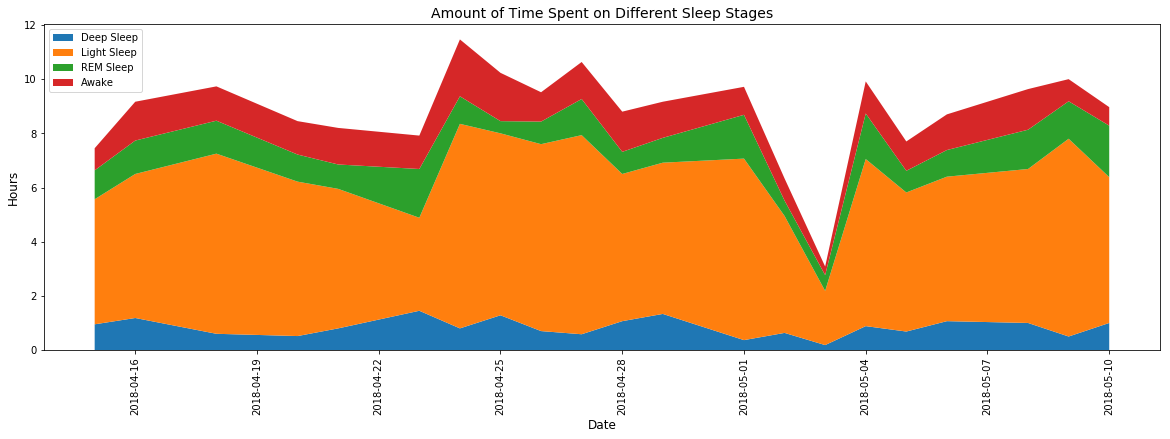

In [10]:
# plot stacked area chart for different sleep stages
x_series = slsummaryall_df['Date']
x = x_series.values
y_df = slsummaryall_df[['Sleep_Deep', 'Sleep_Light', 'Sleep_REM', 'Sleep_stage_Wake']]
y = (y_df.values.T) / 60

fig = plt.figure(figsize=(20, 6))

plt.title('Amount of Time Spent on Different Sleep Stages', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Hours', fontsize=12)
plt.xticks(rotation=90)

plt.stackplot(x, y, labels=['Deep Sleep', 'Light Sleep', 'REM Sleep', 'Awake'])
plt.legend(loc='upper left')
plt.show()

In [11]:
grouped_DOW = slsummaryall_df.groupby('DOW').mean()
grouped_DOW = grouped_DOW.reindex(index = ['Monday','Tuesday','Wednesday', 'Thursday',
                                           'Friday', 'Saturday', 'Sunday'])
grouped_DOW = grouped_DOW.reset_index()
grouped_DOW

,DOW,Duration,Efficiency,MainSleep,Minutes Asleep,Minutes Awake,Sleep_Deep,Sleep_Light,Sleep_REM,Sleep_stage_Wake,Sleep_stage_Wake_Count,Time in Bed
0,Monday,30750000.0,95.500000,1.000000,432.500000,80.000000,79.000000,262.500000,91.000000,80.000000,20.500000,512.500000
1,Tuesday,36980000.0,94.333333,1.000000,523.666667,92.666667,43.333333,398.666667,81.666667,92.666667,28.333333,616.333333
2,Wednesday,32670000.0,93.750000,1.000000,474.250000,70.250000,45.250000,374.750000,54.250000,70.250000,25.750000,544.500000
3,Thursday,25880000.0,96.000000,0.666667,389.666667,41.666667,37.666667,285.666667,66.333333,41.666667,18.000000,431.333333
4,Friday,34800000.0,94.333333,1.000000,504.333333,75.666667,39.666667,384.333333,80.333333,75.666667,34.333333,580.000000
5,Saturday,29640000.0,94.000000,1.000000,415.666667,78.333333,51.000000,314.333333,50.333333,78.333333,24.000000,494.000000
6,Sunday,30380000.0,95.666667,1.000000,437.000000,69.333333,67.000000,310.666667,59.333333,69.333333,23.000000,506.333333


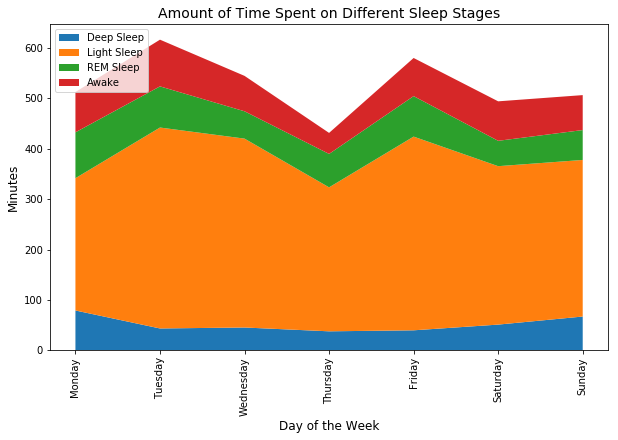

In [12]:
# plot stacked area chart for different sleep stages by day of the week
x = grouped_DOW.index
y_df = grouped_DOW[['Sleep_Deep', 'Sleep_Light', 'Sleep_REM', 'Sleep_stage_Wake']]
y = y_df.values.T

fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Amount of Time Spent on Different Sleep Stages', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Minutes', fontsize=12)

weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax.set_xticks(range(0,7,1))
ax.set_xticklabels(weekday_list, rotation=90)

plt.stackplot(x, y, labels=['Deep Sleep', 'Light Sleep', 'REM Sleep', 'Awake'])
plt.legend(loc='upper left')
plt.show()

## Correlation of Sleep Stats

In [8]:
# prepare dataframe to look at correlations

renamed_df = slsummaryall_df.rename(columns = {
    'Sleep_Deep':'Deep Sleep',
    'Sleep_Light': 'Light Sleep',
    'Sleep_REM': 'REM Sleep',
    'Sleep_stage_Wake_Count':'Number of Awakenings'
})

corr_df = renamed_df[['Date', 'Efficiency', 'Minutes Asleep',
                           'Deep Sleep', 'Light Sleep', 'REM Sleep',
                           'Minutes Awake', 'Number of Awakenings',
                           'Time in Bed'
                          ]]

corr_df.corr()

,Efficiency,Minutes Asleep,Deep Sleep,Light Sleep,REM Sleep,Minutes Awake,Number of Awakenings,Time in Bed
Efficiency,1.000000,-0.194163,0.276437,-0.338727,0.178198,-0.260644,-0.273401,-0.223967
Minutes Asleep,-0.194163,1.000000,0.205422,0.928873,0.450997,0.573341,0.621420,0.983454
Deep Sleep,0.276437,0.205422,1.000000,-0.056731,0.132924,0.479552,0.189856,0.282014
Light Sleep,-0.338727,0.928873,-0.056731,1.000000,0.167257,0.548840,0.615527,0.917103
REM Sleep,0.178198,0.450997,0.132924,0.167257,1.000000,-0.087925,0.103686,0.366921
Minutes Awake,-0.260644,0.573341,0.479552,0.548840,-0.087925,1.000000,0.609236,0.712279
Number of Awakenings,-0.273401,0.621420,0.189856,0.615527,0.103686,0.609236,1.000000,0.667067
Time in Bed,-0.223967,0.983454,0.282014,0.917103,0.366921,0.712279,0.667067,1.000000


In [9]:
# define heatmap function
def heatmap(df, anchor_val):
    sns.set(style = "white", font_scale=1.4)
    corrd = df.corr()
    mask = np.zeros_like(corrd, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    f, ax = plt.subplots(figsize=(12, 8))
    cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
    sns.heatmap(corrd, mask=mask, cmap=cmap, vmax=anchor_val,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

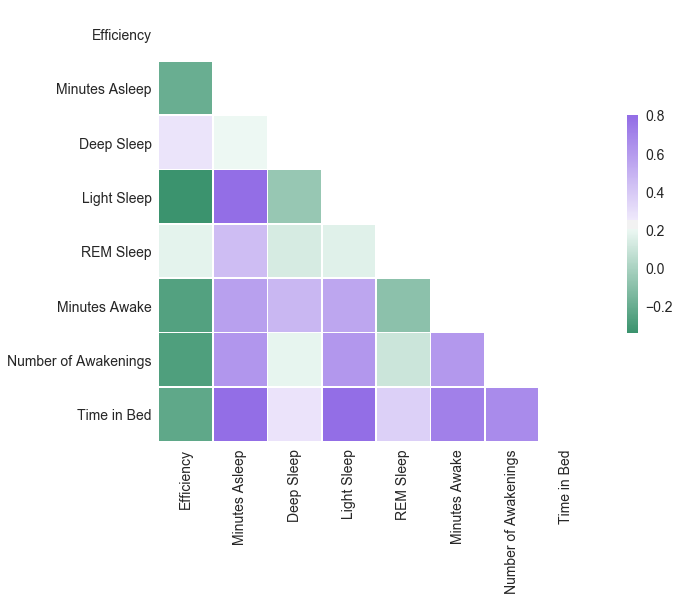

In [10]:
# plot heatmap to look at correlations between stats
heatmap(corr_df, .8)

Interesting...
> Deep sleep is inversely correlated with light sleep and slightly correlated with REM sleep <br>
> Efficiency is positively correlated with deep sleep <br>
> REM sleep also inversely correlated with light sleep but positively correlated with deep sleep! <br>
> Number of awakenings and minutes awake are positively correlated with time in bed

Curious to see what happens with more data.

## Analysis of Average Heart Rate per Sleep Stage

In [177]:
# define function to read files and add date components
def read_files_from_path(path):
    dflist = []
    my_dir = os.listdir(path)
    csvs = [d for d in my_dir if d[-4:] == '.csv']
    for c in csvs:
        df = pd.read_csv(path+c, index_col=None, header=0)
        df['date'] = c[-14:-6]
        year, month, day = int(c[-14:-10]), int(c[-10:-8]), int(c[-8:-6])
        df['year'] = year
        df['month'] = month
        df['day'] = day
        df['DOW'] = datetime.date(year, month, day).strftime('%A')
        df['DOW'] = pd.Categorical(df['DOW'],
                                  categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                              'Friday', 'Saturday', 'Sunday'],
                                  ordered=True)
        dflist.append(df)
    df_all = pd.concat(dflist)
    return df_all

In [178]:
df = read_files_from_path('/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit/downloads/sleep/')

In [179]:
df.head()

,Stage,Time,date,year,month,day,DOW
0,wake,2018-05-13 23:02:30,20180514,2018,5,14,Monday
1,light,2018-05-13 23:03:00,20180514,2018,5,14,Monday
2,deep,2018-05-13 23:47:00,20180514,2018,5,14,Monday
3,light,2018-05-13 23:52:30,20180514,2018,5,14,Monday
4,rem,2018-05-14 00:02:30,20180514,2018,5,14,Monday


In [180]:
sl20180416_df = pd.read_csv('./downloads/sleep/sleepstagesdatetime20180416_0.csv', index_col=None, header=0)
sl20180416_df.head()

,Stage,Time
0,wake,2018-04-15 21:21:30
1,light,2018-04-15 21:28:30
2,rem,2018-04-15 22:28:00
3,light,2018-04-15 22:37:00
4,rem,2018-04-15 23:38:00


In [181]:
hr20180416_df = pd.read_csv('./downloads/heart/heart20180416.csv', index_col=None, header=0)
hr20180416_df.head()

,Time,Heart Rate
0,00:00:01,47
1,00:00:04,47
2,00:00:07,47
3,00:00:09,48
4,00:00:12,48


In [18]:
print(sl20180416_df.shape)
print(hr20180416_df.shape)

(28, 2)
(37566, 2)


In [19]:
## NEEDS FIXING!! Note sleep goes from previous day to today, and heart rate from 12 am to 11.59 pm. 
# Need to separate date from time... or add date to heart rate??

slhr_20180416_df = pd.merge(hr20180416_df, sl20180416_df, how='inner', on='Time')

In [20]:
slhr_20180416_df.head(14)

,Time,Heart Rate,Stage
0,00:39:00,49,wake
1,00:59:00,57,wake
2,01:06:00,50,light
3,01:21:30,55,rem
4,02:24:30,49,deep
5,03:29:00,53,wake
6,05:00:30,73,rem
7,05:05:00,49,light
8,05:22:00,52,wake
9,05:36:00,49,wake


In [21]:
slhr_20180416_df.shape

(12, 3)

In [22]:
def combine_sleep_hr(path_sl, path_hr):
    dflist = []
    
    sl_dir = os.listdir(path_sl)
    hr_dir = os.listdir(path_hr)
    
    csvs_sl = [d for d in sl_dir if d[-4:] == '.csv']
    csvs_hr = [d for d in hr_dir if d[-4:] == '.csv']
    
    for sl in csvs_sl:
        for hr in csvs_hr:
            if sl[-12:-4] == hr[-12:-4]:
                print(sl, hr)
                df_sl = pd.read_csv(path_sl+sl, index_col=None, header=0)
                df_hr = pd.read_csv(path_hr+hr, index_col=None, header=0)
                slhr_df = pd.merge(df_hr, df_sl, how='inner', on='Time')
                slhr_df['date'] = sl[-12:-4]
                year, month, day = int(sl[-12:-8]), int(sl[-8:-6]), int(sl[-6:-4])
                slhr_df['year'] = year
                slhr_df['month'] = month
                slhr_df['day'] = day
                slhr_df['DOW'] = datetime.date(year, month, day).strftime('%A')
                slhr_df['DOW'] = pd.Categorical(slhr_df['DOW'],
                                                categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                                ordered=True)
                print(slhr_df.head(5), slhr_df.shape)
                dflist.append(slhr_df)
            else:
                continue
    df_all = pd.concat(dflist)
    return df_all

In [23]:
path_sl = '/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit/downloads/sleep/'
path_hr = '/Users/dannie/Documents/programming/github/dannie1g/fitbit/python-fitbit/downloads/heart/'
slhr_all_df = combine_sleep_hr(path_sl, path_hr)

sleepstages20180428.csv heart20180428.csv
       Time  Heart Rate  Stage      date  year  month  day       DOW
0  00:15:30          44    rem  20180428  2018      4   28  Saturday
1  04:19:00          46   wake  20180428  2018      4   28  Saturday
2  06:02:00          46  light  20180428  2018      4   28  Saturday
3  21:53:30          47  light  20180428  2018      4   28  Saturday
4  22:06:00          42   wake  20180428  2018      4   28  Saturday (5, 8)
sleepstages20180415.csv heart20180415.csv
       Time  Heart Rate  Stage      date  year  month  day     DOW
0  00:33:00          50  light  20180415  2018      4   15  Sunday
1  00:36:30          56   deep  20180415  2018      4   15  Sunday
2  01:03:00          51  light  20180415  2018      4   15  Sunday
3  01:10:30          53   deep  20180415  2018      4   15  Sunday
4  02:19:00          56    rem  20180415  2018      4   15  Sunday (13, 8)
sleepstages20180429.csv heart20180429.csv
       Time  Heart Rate  Stage      date  y

In [24]:
slhr_all_df.head(10)

,Time,Heart Rate,Stage,date,year,month,day,DOW
0,00:15:30,44,rem,20180428,2018,4,28,Saturday
1,04:19:00,46,wake,20180428,2018,4,28,Saturday
2,06:02:00,46,light,20180428,2018,4,28,Saturday
3,21:53:30,47,light,20180428,2018,4,28,Saturday
4,22:06:00,42,wake,20180428,2018,4,28,Saturday
0,00:33:00,50,light,20180415,2018,4,15,Sunday
1,00:36:30,56,deep,20180415,2018,4,15,Sunday
2,01:03:00,51,light,20180415,2018,4,15,Sunday
3,01:10:30,53,deep,20180415,2018,4,15,Sunday
4,02:19:00,56,rem,20180415,2018,4,15,Sunday


In [21]:
slhr_all_df.shape

(209, 8)

In [22]:
slhr_all_df.dtypes

Time            object
Heart Rate       int64
Stage           object
date            object
year             int64
month            int64
day              int64
DOW           category
dtype: object

In [25]:
droped_simplified = slhr_all_df.loc[(slhr_all_df['Stage'] != 'awake') &\
                                    (slhr_all_df['Stage'] != 'restless') &\
                                    (slhr_all_df['Stage'] != 'asleep') ]

In [26]:
groupedstage_df = slhr_all_df.groupby(['Stage']).mean()
groupedstage_df

,Heart Rate,year,month,day
Stage,,,,
asleep,53.125000,2018.0,4.000000,23.625000
awake,57.000000,2018.0,4.000000,30.000000
deep,47.944444,2018.0,4.111111,20.666667
light,52.575000,2018.0,4.112500,19.812500
rem,53.115385,2018.0,4.192308,18.076923
restless,51.160000,2018.0,4.000000,22.680000
wake,51.971429,2018.0,4.085714,20.771429


In [27]:
groupedstage2_df = droped_simplified.groupby(['Stage']).mean()
groupedstage2_df

,Heart Rate,year,month,day
Stage,,,,
deep,47.944444,2018.0,4.111111,20.666667
light,52.575000,2018.0,4.112500,19.812500
rem,53.115385,2018.0,4.192308,18.076923
wake,51.971429,2018.0,4.085714,20.771429


/Users/dannie/anaconda3/envs/playtime/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,0,'Sleep Stage')

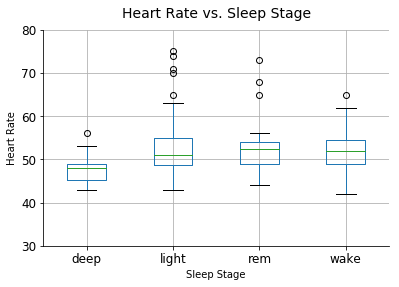

In [28]:
plt.figure(figsize = (16,8))
droped_simplified.boxplot(column = 'Heart Rate', by = 'Stage')

ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False) 
ax.set_ylim([30, 80])
plt.xticks(fontsize=12)  
plt.yticks(fontsize=12) 

plt.title('')
plt.suptitle('Heart Rate vs. Sleep Stage', fontsize=14)
plt.ylabel('Heart Rate')
plt.xlabel('Sleep Stage')

## Plotting Hypnogram

In [156]:
sl20180514_df = pd.read_csv('./downloads/sleep_detailedstages/sleepstagesdatetime20180514_0.csv',
                            index_col=None, header=0)
sl20180514_df.head()

,Stage,Time
0,wake,2018-05-13T23:02:30
1,light,2018-05-13T23:03:00
2,deep,2018-05-13T23:47:00
3,light,2018-05-13T23:52:30
4,rem,2018-05-14T00:02:30


In [157]:
sl20180514_df.dtypes

Stage    object
Time     object
dtype: object

In [158]:
sl20180514_df['Time'] = pd.to_datetime(sl20180514_df['Time']).apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))

In [160]:
sl20180514_df['Time'] = pd.to_datetime(sl20180514_df['Time'], format='%Y-%m-%d %H:%M:%S')

In [162]:
sl20180514_df.head()

,Stage,Time
0,wake,2018-05-13 23:02:30
1,light,2018-05-13 23:03:00
2,deep,2018-05-13 23:47:00
3,light,2018-05-13 23:52:30
4,rem,2018-05-14 00:02:30


In [163]:
sl20180514_df.dtypes

Stage            object
Time     datetime64[ns]
dtype: object

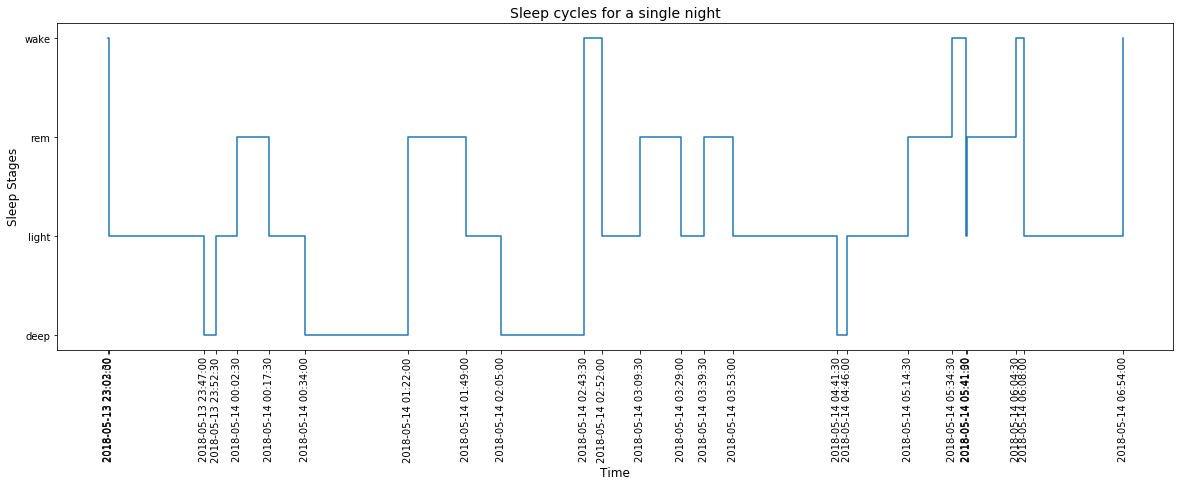

In [171]:
x = sl20180514_df['Time']
y = sl20180514_df['Stage']

fig, ax = plt.subplots(figsize=(20, 6))

plt.title('Sleep cycles for a single night', fontsize=14)

plt.xlabel('Time', fontsize=12)
plt.ylabel('Sleep Stages', fontsize=12)

plt.step(x, y, where='post')

xticks = sl20180514_df['Time'].values
plt.xticks(xticks, rotation=90)
time_labels = sl20180514_df['Time']
ax.set_xticklabels(time_labels, rotation=90)

plt.show()

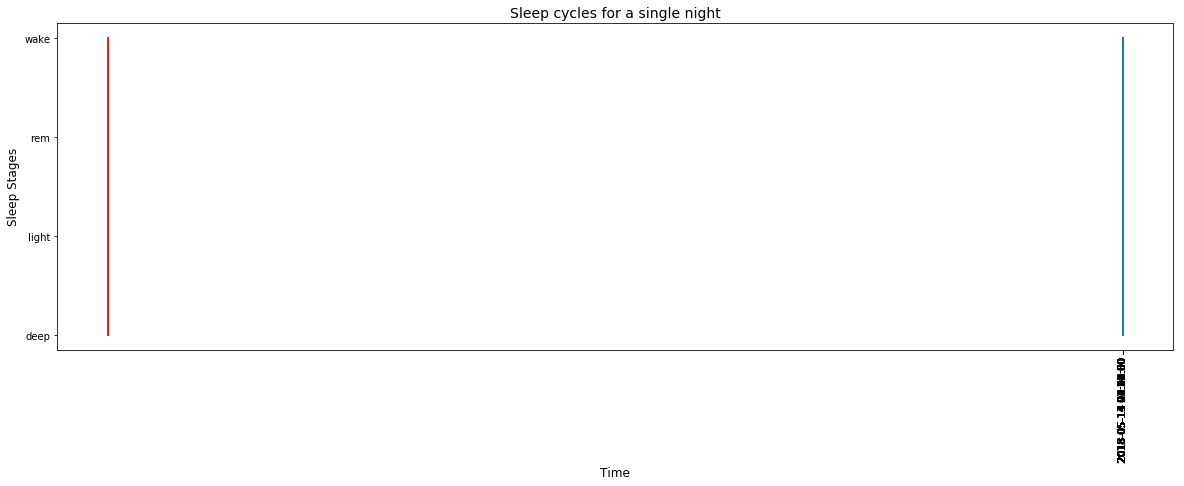

In [176]:
# color according to stages???

x = sl20180514_df['Time']
y = sl20180514_df['Stage']

fig, ax = plt.subplots(figsize=(20, 6))

plt.title('Sleep cycles for a single night', fontsize=14)

plt.xlabel('Time', fontsize=12)
plt.ylabel('Sleep Stages', fontsize=12)

wake = np.ma.masked_where(y == 'wake', y)
rem = np.ma.masked_where(y == 'rem', y)
light = np.ma.masked_where(y == 'light', y)
deep = np.ma.masked_where(y == 'deep', y)


xticks = sl20180514_df['Time'].values
plt.xticks(xticks, rotation=90)
time_labels = sl20180514_df['Time']
ax.set_xticklabels(time_labels, rotation=90)


plt.step(x, y, rem, y, light, y, deep, where='post')
plt.show()